## Objective of the Analysis 



* To find the relationships between:
    * Temperature (F) vs. Latitude
    * Humidity (%) vs. Latitude
    * Cloudiness (%) vs. Latitude
    * Wind Speed (mph) vs. Latitude

## Output/Finding of the Analysis

* **As we move from the earth poles toward the equator, the temperature going to raise dramatically. The can be confirmed that the countries at the equator, such as Ecuador, most of the Africans and middle East countries characterize by high temperature.** 
* **Because of high temperature in the equator regions, humidity seems to be higher as you move away from equator to the earth poles, eastern and western hemispheres.** 
* **Cloud coverage seems to be higher at the equator and slightly higher in the poles.**
* **Equatorial regions is characterized by high wind speed.**


--------

In [1]:
# Dependencies
import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns
from config import api_key



## Starting Point:- [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm)

* **Latitude values** are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. So the minmum and maxmum values for Latitude are : -90°  and + +90° respectively.
* **Longitude** values are measured relative to the prime meridian. They range from -180° when traveling west to + 180° when traveling east. So the minmum and maximum values for Longitude are : -180°  and +180° respectively. 

In [2]:
# So, create a Dictionaries to hold the minmum and maximum values for latitude and longitude in degree.
lat = {'min': -90, 'max': 90}
log = {'min': -180, 'max': 180}

In [3]:
# Then, Create arraies of the latitude and longitude in degree within the interval of 0.001
lat_var= np.arange(lat['min'], lat['max'], 0.001)
log_var = np.arange(log['min'], log['max'], 0.001)

In [4]:
#See the array for latitude
lat_var

array([-90.   , -89.999, -89.998, ...,  89.997,  89.998,  89.999])

In [5]:
#See the array for longitude
log_var

array([-180.   , -179.999, -179.998, ...,  179.997,  179.998,  179.999])

In [6]:
# Create a Table to hold the cities' name, weather variables, latitude and longitue ranges.
wtbl_col_name = ('city_name', 'country_code', 'rand_lat', 'rand_log', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_weather_df = pd.DataFrame(columns = wtbl_col_name)
cities_weather_df

,city_name,country_code,rand_lat,rand_log,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [7]:
# Define the sample size(more than 500 cities).
sample_size = 550

In [8]:
#Use Openweather url.
trgt_url = 'http://api.openweathermap.org/data/2.5/weather?q='
# set the units
units = 'imperial'

In [10]:
record = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_weather_df) < sample_size:
    # Choose a random point within our lat-log domain.
    rand_lat = random.choice(lat_var)
    rand_log = random.choice(log_var)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_log)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = trgt_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        # Avoid repeating cities
        if city_name not in cities_weather_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_weather_df)+1))
            # Append data to df columns
            cities_weather_df.set_value(record, "city_name", city_name)
            cities_weather_df.set_value(record, "country_code", country_code)
            cities_weather_df.set_value(record, "rand_lat", rand_lat)
            cities_weather_df.set_value(record, "rand_log", rand_log)
            cities_weather_df.set_value(record, "Latitude", latitude)
            cities_weather_df.set_value(record, "Longitude", longitude)
            cities_weather_df.set_value(record, "Temp (F)", temp)
            cities_weather_df.set_value(record, "Humidity (%)", humidity)
            cities_weather_df.set_value(record, "Cloudiness (%)", cloud)
            cities_weather_df.set_value(record, "Wind Speed (mph)", wind)

            record += 1
        
            # Wait between 1-4 seconds before next loop
            time.sleep(random.randint(1, 2))
        else:
            pass
    else:
        pass
    

City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Balikpapan. http://api.openweathermap.org/data/2.5/weather?q=balikpapan,id&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

City: Sungaipenuh. http://api.openweathermap.org/data/2.5/weather?q=sungaipenuh,id&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Carnarvon. http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Paamiut. http://api.openweathermap.org/data/2.5/weather?q=paamiut,gl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Baykit. http://api.openweathermap.org/data/2.5/weather?q=baykit,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Arlit. http://api.openweathermap.org/data/2.5/weather?q=arlit,ne&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF len

City: Shaoguan. http://api.openweathermap.org/data/2.5/weather?q=shaoguan,cn&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Lagos. http://api.openweathermap.org/data/2.5/weather?q=lagos,pt&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Chokurdakh. http://api.openweathermap.org/data/2.5/weather?q=chokurdakh,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Sarh. http://api.openweathermap.org/data/2.5/weather?q=sarh,td&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Outjo. http://api.openweathermap.org/data/2.5/weather?q=outjo,na&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Yellowknife. http://api.openweathermap.org/data/2.5/weat

City: Mahebourg. http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Castro. http://api.openweathermap.org/data/2.5/weather?q=castro,cl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Nikolskoye. http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Makakilo City. http://api.openweathermap.org/data/2.5/weather?q=makakilo city,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Vilhena. http://api.openweathermap.org/data/2.5/weather?q=vilhena,br&units=imp

City: Provideniya. http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Alofi. http://api.openweathermap.org/data/2.5/weather?q=alofi,nu&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Praya. http://api.openweathermap.org/data/2.5/weather?q=praya,id&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Bethel. http://api.openweathermap.org/data/2.5/weather?q=bethel,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ranchpar. http://api.openweathermap.org/data/2.5/weather?q=ranchpar,am&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 122
City: Billings. http:/

City: Port Lincoln. http://api.openweathermap.org/data/2.5/weather?q=port lincoln,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 131
City: Kahului. http://api.openweathermap.org/data/2.5/weather?q=kahului,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 132
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Sao Caetano de Odivelas. http://api.openweathermap.org/data/2.5/weather?q=sao caetano de odivelas,br&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 133
City: Hilo. http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Lebu. http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 134
City: Hobart. http://api.openweather

City: Kavaratti. http://api.openweathermap.org/data/2.5/weather?q=kavaratti,in&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Faanui. http://api.openweathermap.org/data/2.5/weather?q=faanui,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 156
City: Grindavik. http://api.openweathermap.org/data/2.5/weather?q=grindavik,is&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 157
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City:

City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Okhotsk. http://api.openweathermap.org/data/2.5/weather?q=okhotsk,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 181
City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Khandyga. http://api.openweathermap.org/data/2.5/weather?q=khandyga,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 182
City: Southbridge. http://api.openweathermap.org/data/2.5/weather?q=southbridge,nz&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 183
City: Butaritari. http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Noumea. http://api.openweathermap.org/data/2.5/weather?q=noumea,nc&units=imperial&APPI

City: Beringovskiy. http://api.openweathermap.org/data/2.5/weather?q=beringovskiy,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 203
City: Nola. http://api.openweathermap.org/data/2.5/weather?q=nola,cf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 204
City: Cabo San Lucas. http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas,mx&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Khatanga. http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 205
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Hutchinson. http://api.openweathermap.org/data/2.5/weather?q=hutchinson,us&u

City: Minot. http://api.openweathermap.org/data/2.5/weather?q=minot,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 226
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Isangel. http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Faanui. http://api.openweathermap.org/data/2.5/weather?q=faanui,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Kargat. http://api.openweathermap.org/data/2.5/weather?q=kargat,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 227
City: Rikitea. ht

City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Shimabara. http://api.openweathermap.org/data/2.5/weather?q=shimabara,jp&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 248
City: Castro. http://api.openweathermap.org/data/2.5/weather?q=castro,cl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Sisimiut. http://api.openweathermap.org/data/2.5/weather?q=sisimiut,gl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 249
City: Nanortalik. http://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 250
City: Saskylakh. http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&APPI

City: Hami. http://api.openweathermap.org/data/2.5/weather?q=hami,cn&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 274
City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Hofn. http://api.openweathermap.org/data/2.5/weather?q=hofn,is&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 275
City: Ancud. http://api.openweathermap.org/data/2.5/weather?q=ancud,cl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Dikson. http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Lompoc. http://api.openweathermap.org/data/2.5/weather?q=lompoc,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Cabo San Lucas. http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas,mx&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Haines Junction. ht

City: East London. http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ormara. http://api.openweathermap.org/data/2.5/weather?q=ormara,pk&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 296
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Lavrentiya. http://api.openweathermap.org/data/2.5/weather?q=lavrentiya,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Fortuna. http://api.openweathermap.org/data/2.5/weather?q=fortuna,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Kahului. http://api.openweathermap.org/data/2.5/weather?q=kahului,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Bayeux. http://api.openweathermap.org/data/2.5/weather?q=bayeux,br&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 297
City:

City: Georgetown. http://api.openweathermap.org/data/2.5/weather?q=georgetown,sh&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Khatanga. http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Salinopolis. http://api.openweathermap.org/data/2.5/weather?q=salinopolis,br&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 314
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Rantepao. http://api.openweathermap.org/data/2.5/weather?q=rantepao,id&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 315
City: Saint-Philippe. http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=e32204053692af0c546b

City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Lorengau. http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Yumen. http://api.openweathermap.org/data/2.5/weather?q=yumen,cn&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Najran. http://api.openweathermap.org/data/2.5/weather?q=najran,sa&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 333
City: Mar del Plata. http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Isangel. http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Okhotsk. http://api.openweathermap.org/da

City: Pangnirtung. http://api.openweathermap.org/data/2.5/weather?q=pangnirtung,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Morondava. http://api.openweathermap.org/data/2.5/weather?q=morondava,mg&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 351
City: Provideniya. http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Nanpiao. http://api.openweathermap.org/data/2.5/weather?q=nanpiao,cn&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 352
City: Outlook. http://api.openweathermap.org/data/2.5/weather?q=outlook,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 353
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&uni

City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Dunedin. http://api.openweathermap.org/data/2.5/weather?q=dunedin,nz&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Tuktoyaktuk. http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: East London. http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Taoudenni. http://api.openweathermap.org/data/2.5/weather?q=taoudenni,m

City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Bredasdorp. http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Adrar. http://api.openweathermap.org/data/2.5/weather?q=adrar,dz&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Taltal. http://api.openweathermap.org/data/2.5/weather?q=taltal,cl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 383
City: Phangnga. http://api.openweathermap.org/data/2.5/weather?q=phangnga,th&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 384
City: Sioux Lookout. http://api.openweathermap.org/data/2.5/weather?q=sioux lookout,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Sta

City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Necochea. http://api.openweathermap.org/data/2.5/weather?q=necochea,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 402
City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Storforshei. http://api.openweathermap.org/data/2.5/weather?q=storforshei,no&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 403
City: Mikhaylovka. http://api.openweathermap.org/data/2.5/weather?q=mikhaylovka,kz&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 404
City: Hithadhoo. http://api.openweathermap.org/data/2.5/weather?q=hithadhoo,mv&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Turek. http://api.openweathermap.org/data/2.5/weather?q=turek,pl&units=imperial&

City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Nouadhibou. http://api.openweathermap.org/data/2.5/weather?q=nouadhibou,mr&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 421
City: Mount Gambier. http://api.openweathermap.org/data/2.5/weather?q=mount gambier,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Qaanaaq. http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Mahebourg. http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Wilmington. h

City: Kamenka. http://api.openweathermap.org/data/2.5/weather?q=kamenka,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 440
City: Mayumba. http://api.openweathermap.org/data/2.5/weather?q=mayumba,ga&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Thompson. http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Clyde River. http://api.openweathermap.org/data/2.5/weather?q=clyde river,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Altay. http://api.openweathermap.org/data/2.5/weather?q=altay,cn&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 441
City: Clyde River. http://api.openweathermap.org/data/2.5/weather?q=clyde river,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City:

City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Cidreira. http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Labuhan. http://api.openweathermap.org/data/2.5/weather?q=labuhan,id&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ilulissat. http://api.openweathermap.org/data/2.5/weather?q=ilulissat,gl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Biloxi. http://api.openweathermap.org/data/2.5/weather?q=biloxi,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 456
City: Sawakin. http://api.openweathermap.org/data/2.5/weather?q=sawakin,sd&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 457
City: Rik

City: Grants. http://api.openweathermap.org/data/2.5/weather?q=grants,us&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 472
City: Tiarei. http://api.openweathermap.org/data/2.5/weather?q=tiarei,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 473
City: Severo-Yeniseyskiy. http://api.openweathermap.org/data/2.5/weather?q=severo-yeniseyskiy,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 474
City: Tasiilaq. http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Beringovskiy. http://api.openweathermap.org/data/2.5/weather?q=beringovskiy,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Namatanai. http://api.openweathermap.org/data/2.5/weather?q=namatanai,pg&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Kavieng. http://api.openweathermap.org/data/2.5/weather?q=kavieng,

City: Stromness. http://api.openweathermap.org/data/2.5/weather?q=stromness,gb&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 494
City: Vao. http://api.openweathermap.org/data/2.5/weather?q=vao,nc&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Brae. http://api.openweathermap.org/data/2.5/weather?q=brae,gb&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Gediz. http://api.openweathermap.org/data/2.5/weather?q=gediz,tr&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 495
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Peniche. http://api.openweathermap.org/data/2.5/weather?q=peniche,pt&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Songjianghe. http

City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Kieta. http://api.openweathermap.org/data/2.5/weather?q=kieta,pg&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 518
City: Bandarbeyla. http://api.openweathermap.org/data/2.5/weather?q=bandarbeyla,so&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 519
City: Nouadhibou. http://api.openweathermap.org/data/2.5/weather?q=nouadhibou,mr&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Saint-Philippe. http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Gigmoto. http://api.openweathermap.org/data/2.5/weather?q=gigmoto,ph&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 520
City: Ixtapa. http://api.openweathermap.org/data/2.5/weather?q=ixtapa,mx

City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Arkhangelsk. http://api.openweathermap.org/data/2.5/weather?q=arkhangelsk,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 531
City: Shitanjing. http://api.openweathermap.org/data/2.5/weather?q=shitanjing,cn&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 532
City: Tazovskiy. http://api.openweathermap.org/data/2.5/weather?q=tazovskiy,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 533
City: Nanortalik. http://api.openweathermap.org/data/2.5/weather?q=nanortalik,gl&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Provideniya. http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Aberdeen. http://api.openweathermap.org/data/2.5/weather?q=aberdeen,

City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Pevek. http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Berdigestyakh. http://api.openweathermap.org/data/2.5/weather?q=berdigestyakh,ru&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Portland. http://api.openweathermap.org/data/2.5/weather?q=portland,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
Status code: 200. DF length is now: 547
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=e32204053692af0c546bc2d23f921c27
City: Brownsville. http://api.openweath

In [11]:
# View the dataframe
cities_weather_df.head()

,city_name,country_code,rand_lat,rand_log,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,balikpapan,id,-1.486,118.05,-1.24,116.86,84.46,98,8,4.85
1,sungaipenuh,id,-2.452,99.994,-2.08,101.38,71.32,91,92,1.95
2,carnarvon,au,-29.556,88.639,-24.87,113.63,66.55,80,0,16.04
3,paamiut,gl,63.211,-49.585,61.99,-49.67,37.39,100,44,3.62
4,bluff,nz,-70.236,158.48,-46.6,168.33,47.38,100,68,25.55


---------------

# Now, Plot Graphs

## Latitude vs. Temperature Plot

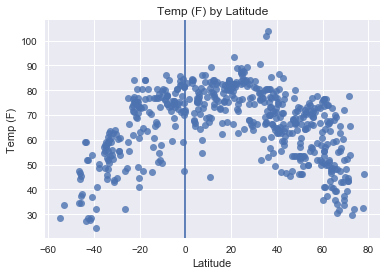

In [15]:
# Build a scatter plot City Latitude vs. Temperature
sns.set_style('ticks')
sns.set(style="darkgrid")

fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Temp (F)", data=cities_weather_df, fit_reg=False).set_title('Temp (F) by Latitude')
plt.axvline(x=0)
# Save the figure in the file named "Output" 
plt.savefig("Output/lat_v_temp.png")

# Show plot
plt.show()

--------------

## Latitude vs. Humidity Plot

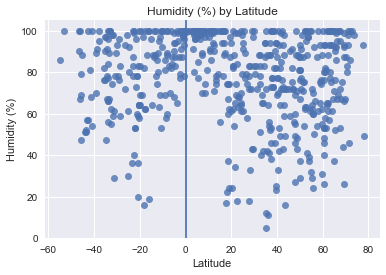

In [16]:
# Build a scatter plot City Latitude vs. Humidity
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Humidity (%)", data=cities_weather_df, fit_reg=False).set_title('Humidity (%) by Latitude')
plt.axvline(x=0)
# Save the figure in the file named "Output" 
plt.savefig("Output/lat_v_humidity.png")

# Show plot
plt.show()

---------------

## Latitude vs. Cloudiness Plot

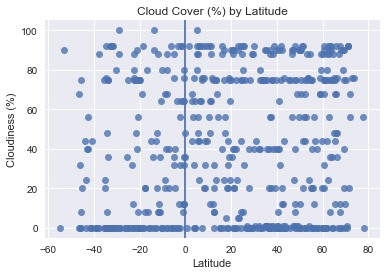

In [17]:
# Build a scatter plot City Latitude vs. Cloudiness
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Cloudiness (%)", data=cities_weather_df, fit_reg=False).set_title('Cloud Cover (%) by Latitude')
plt.axvline(x=0)
# Save the figure in the file named "Output" 
plt.savefig("Output/lat_v_cloud.png")

# Show plot
plt.show()

------------

## Latitude vs. Wind Speed Plot

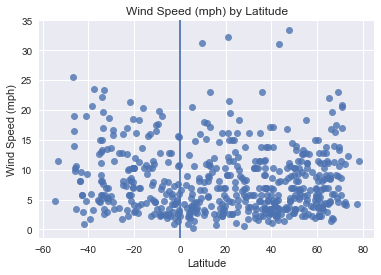

In [18]:
# Build a scatter plot City Latitude vs. Wind Speed
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Wind Speed (mph)", data=cities_weather_df, fit_reg=False).set_title('Wind Speed (mph) by Latitude')
plt.axvline(x=0)
# Save the figure in the file named "Output" 
plt.savefig("Output/lat_v_wind.png")

# Show plot
plt.show()


In [ ]:
# add closest city and country column
location_data['closest_city'] = ""
location_data['country'] = ""

#find and add closest city and country code
for index, row in location_data.iterrows():
    lat = row['lat_var']
    log = row['log_var']
    location_data.set_value(index, 'closest_city', citipy.nearest_city(lat, log).city_name)
    location_data.set_value(index, 'country', citipy.nearest_city(lat, lng).country_code)

------------